# Import Required Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
from sklearn import manifold

# Read in and Clean Data

In [8]:
#read in csv file and convert to DataFrame
three_mer_csv=pd.read_csv('Data/covid_kmer_new_3.csv')
three_mer=pd.DataFrame(three_mer_csv)
print('Shape of dataframe:',three_mer.shape)
#drop 1st column with metadata about country
three_mer=three_mer.drop('Unnamed: 0',axis=1)
#store target column to later concatenate it with PCA DataFrame
three_mer_strains=three_mer['target']
print('COVID strains:',three_mer_strains.unique())
#Original attempt at resolving issue of PCA unable to parse strings
def strain_to_int(strain):
    if strain=='Alpha':
        return 1
    elif strain=='Beta':
        return 2
    elif strain=='Delta':
        return 3
    elif strain=='Gamma':
        return 4
    else:
        return 5
#three_mer=three_mer['target'].apply(strain_to_int)

#make a DataFrame without target column for PCA and standardizing
three_mer_no_strain=three_mer.drop('target',axis=1)

#standardize the DataFrame
three_mer_standardized = pd.DataFrame(StandardScaler().fit_transform(three_mer_no_strain),columns=three_mer_no_strain.columns)
print(three_mer_standardized.head(n=3))

Shape of dataframe: (250, 66)
COVID strains: ['Alpha' 'Beta' 'Delta' 'Gamma' 'Omicron']
        AAA       AAC       AAG       AAT       ACA       ACC       ACG  \
0 -2.447802 -2.472326 -2.670658 -2.842454 -2.696209 -2.933528 -2.179344   
1  0.327179  0.407624  0.452163  0.371297  0.413410  0.535677  0.462641   
2  0.091726  0.186089  0.209875 -0.003312  0.130717  0.259717  0.169087   

        ACT       AGA       AGC  ...       TCG       TCT       TGA       TGC  \
0 -2.587881 -2.843637 -2.509609  ... -1.827743 -2.697049 -2.694814 -2.307379   
1  0.445454  0.431432  0.484289  ...  0.181060  0.516038  0.447769  0.453924   
2  0.122047  0.199341  0.071337  ...  0.047140  0.030025  0.226806  0.115806   

        TGG       TGT       TTA       TTC       TTG       TTT  
0 -2.501467 -2.667474 -2.625769 -2.835945 -2.533282 -2.215580  
1  0.374957  0.367634  0.435777  0.429342  0.384989  0.366816  
2  0.186779 -0.000258  0.046598  0.169275  0.273462  0.004120  

[3 rows x 64 columns]


# Perform and Plot PCA

In [10]:
#got number of components from screen plot
pca = PCA(n_components=10)

principal_components = pca.fit_transform(three_mer_standardized)
#convert principalComponents into a DF and explicitly set columns
principal_df = pd.DataFrame(data = principal_components
              , columns = ['principal component 1', 'principal component 2', 'principal component 3',
                           'principal component 4', 'principal component 5', 'principal component 6',
                           'principal component 7', 'principal component 8', 'principal component 9',
                           'principal component 10'])
#combine principal_df with the column of COVID-19 strains
principal_df = pd.concat([principal_df,  three_mer_strains], axis = 1)
principal_df = principal_df.rename(columns={'target': 'COVID 19 Variants'})
principal_df.head(n=3)


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,COVID 19 Variants
0,20.702187,-0.525996,-1.233868,0.049329,-0.959929,-0.639370,-0.581882,0.037376,0.158306,0.315880,Alpha
1,-3.295978,0.213596,-0.028508,-0.486799,-0.024687,-0.134246,0.056044,0.106148,-0.025536,0.180458,Alpha
2,-0.780869,0.158307,-0.253597,-0.630707,-0.136307,-0.562778,0.009273,0.374668,-0.030636,0.211140,Alpha


### Checking variance to see how they got different explained variance

In [11]:
print('explained_variance_ from pca object')
print(pca.explained_variance_)
print()
print('explained_variance_ratio_ from pca object')
print(pca.explained_variance_ratio_)
print()
print('Direct calculation of explained_variance_ratio from formula:')
print('pca.explained_variance_/np.sum(pca.explained_variance_')
print(pca.explained_variance_/np.sum(pca.explained_variance_))
print()
print('Cumulative varince per principal component')
print(pca.explained_variance_ratio_.cumsum())

explained_variance_ from pca object
[62.37352547  0.42502756  0.23158819  0.19283179  0.11827113  0.10901718
  0.10240099  0.07493992  0.07244885  0.06524168]

explained_variance_ratio_ from pca object
[0.97068799 0.00661449 0.00360409 0.00300094 0.00184059 0.00169658
 0.00159362 0.00116625 0.00112749 0.00101532]

Direct calculation of explained_variance_ratio from formula:
pca.explained_variance_/np.sum(pca.explained_variance_
[0.97817359 0.0066655  0.00363188 0.00302409 0.00185479 0.00170966
 0.0016059  0.00117525 0.00113618 0.00102315]

Cumulative varince per principal component
[0.97068799 0.97730248 0.98090657 0.98390752 0.98574811 0.98744469
 0.98903831 0.99020456 0.99133204 0.99234737]


### Plot the 1st 2 prinicipal components

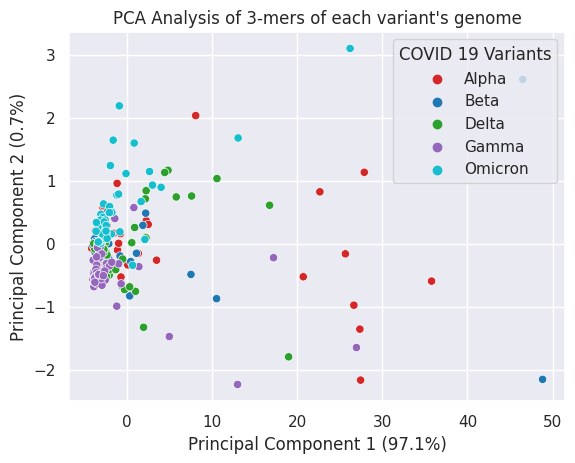

In [224]:
#store variables to print axes labels
pc1_variance_explained=round(100*pca.explained_variance_ratio_[0],1)
pc2_variance_explained=round(100*pca.explained_variance_ratio_[1],1)

#create color dictionary for variant:color
pca_color_dict = {
    'Alpha': 'tab:red',
    'Beta': 'tab:blue',
    'Delta': 'tab:green',
    'Gamma': 'tab:purple',
    'Omicron':'tab:cyan'
}
#plot the scatterplot
fig=plt.figure()
plot=sns.scatterplot(data=principal_df, x='principal component 1', 
                     y='principal component 2',hue='COVID 19 Variants',
                     palette=pca_color_dict)

#plot.label(title="PCA Analysis of 3-mers of each variant's genome")
#plot.title("PCA Analysis of 3-mers of each variant's genome")
#plot.set(label="Principal Component 1 ("+str(pc1_variance_explained)+"%)")
plot.set_title('PCA Analysis of 3-mers of each variant\'s genome')
plot.set(xlabel="Principal Component 1 ("+str(pc1_variance_explained)+"%)")
plot.set(ylabel="Principal Component 2 ("+str(pc2_variance_explained)+"%)")
fig.savefig('pca_3mer.pdf')

# Perform and Plot t-SNE

Original t-SNE:
           0          1 COVID 19 Variants
0 -15.474244 -11.428178             Alpha
1   4.326218   7.129815             Alpha
2  -8.800213  -3.668478             Alpha

Flipped x-axis and y-axis:
           0          1 COVID 19 Variants
0  15.474244  11.428178             Alpha
1  -4.326218  -7.129815             Alpha
2   8.800213   3.668478             Alpha


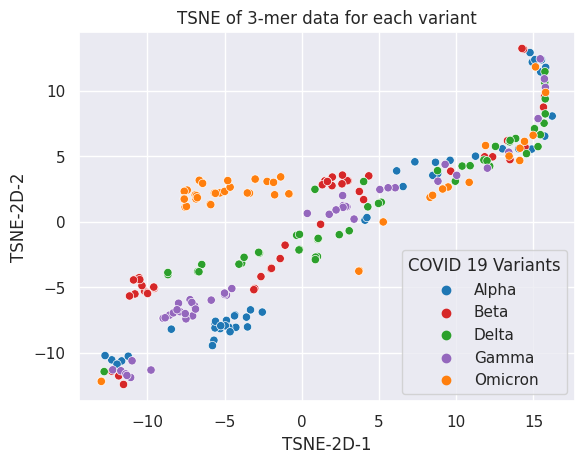

In [226]:
t_sne = manifold.TSNE(
    n_components=2,
    learning_rate="auto", #between 10-1000, also "auto"
    perplexity=35, #default=30
    n_iter=350, #minimum of 250
    init='random',
    random_state=2 #setting a seed so that figure is reproducible
)
#fit the data to t_sne
three_mer_t_sne = t_sne.fit_transform(three_mer_no_strain)
#convert it to a dataframe and add strains column
three_mer_t_sne=pd.DataFrame(data=three_mer_t_sne)
three_mer_t_sne['COVID 19 Variants']=three_mer_strains
#Show original t-SNE
print('Original t-SNE:')
print(three_mer_t_sne.head(n=3))
print()
#To try to get it as close as possible to figure: need to flip both axes
three_mer_t_sne[0]=three_mer_t_sne[0].apply(lambda x:x*-1)
three_mer_t_sne[1]=three_mer_t_sne[1].apply(lambda x:x*-1)
print('Flipped x-axis and y-axis:')
print(three_mer_t_sne.head(n=3))

#create color dict for variant:color
tsne_color_dict = {
    'Alpha': 'tab:blue',
    'Beta': 'tab:red',
    'Delta': 'tab:green',
    'Gamma': 'tab:purple',
    'Omicron':'tab:orange'
}

#plot the figure
fig=plt.figure()
plot=sns.scatterplot(data=three_mer_t_sne,x=three_mer_t_sne[0],
                      y=three_mer_t_sne[1],hue='COVID 19 Variants',
                     palette=tsne_color_dict)
plot.set(xlabel="TSNE-2D-1")
plot.set(ylabel="TSNE-2D-2")
plot.set_title('TSNE of 3-mer data for each variant')
fig.savefig('tsne_3mer.pdf')

# Perform & Plot UMAP

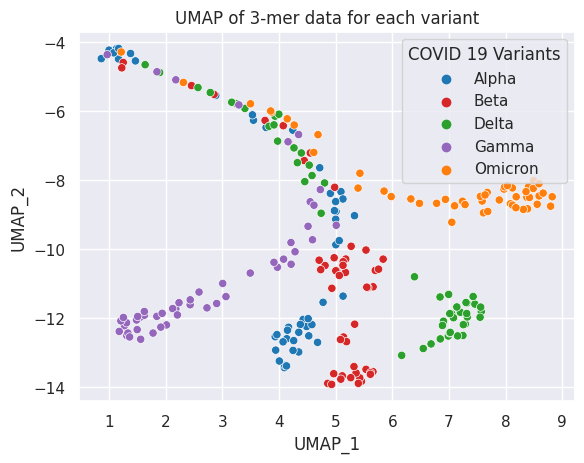

In [11]:
umap_color_dict = {
    'Alpha': 'tab:blue',
    'Beta': 'tab:red',
    'Delta': 'tab:green',
    'Gamma': 'tab:purple',
    'Omicron':'tab:orange'
}
#perform UMAP
reducer = umap.UMAP(random_state=7,
                    n_neighbors=40, #default 15
                    min_dist=0.2 #default =0.1
                   )
three_mer_umap=reducer.fit_transform(three_mer_standardized)
#convert to dataframe and add strains
three_mer_umap=pd.DataFrame(data=three_mer_umap)
three_mer_umap['COVID 19 Variants']=three_mer_strains
three_mer_umap[0]=three_mer_umap[0].apply(lambda x:x*-1)
#three_mer_umap[1]=three_mer_umap[1].apply(lambda x:x*-1)
#create color dict for variant:color

# #plot the figure
fig=plt.figure()
plot=sns.scatterplot(data=three_mer_umap,x=three_mer_umap[1],
                     y=three_mer_umap[0],hue='COVID 19 Variants',
                     palette=umap_color_dict)
plot.set(xlabel="UMAP_1")
plot.set(ylabel="UMAP_2")
plot.set_title('UMAP of 3-mer data for each variant')
fig.savefig('umap_3mer.pdf')

[Text(0, 0.5, 'UMAP_2')]

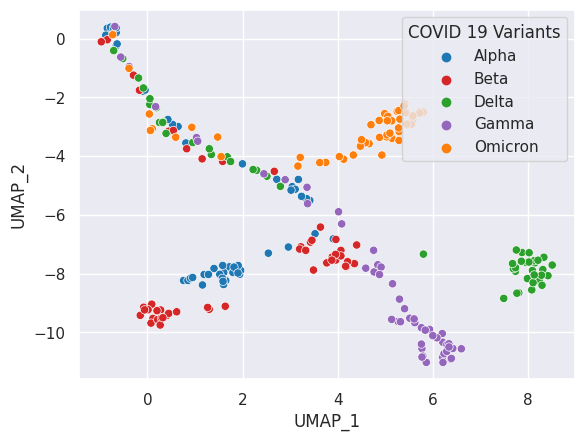

In [46]:
reducer = umap.UMAP(random_state=8,
                    n_neighbors=25, #default 15
                    min_dist=0.2 #default =0.1
                   ) 
three_mer_umap=reducer.fit_transform(three_mer_standardized)
#convert to dataframe and add strains
three_mer_umap=pd.DataFrame(data=three_mer_umap)
three_mer_umap['COVID 19 Variants']=three_mer_strains
three_mer_umap[0]=three_mer_umap[0].apply(lambda x:x*-1)
#three_mer_umap[1]=three_mer_umap[1].apply(lambda x:x*-1)
#create color dict for variant:color

# #plot the figure
plot=sns.scatterplot(data=three_mer_umap,x=three_mer_umap[1],
                     y=three_mer_umap[0],hue='COVID 19 Variants',
                     palette=umap_color_dict)
plot.set(xlabel="UMAP_1")
plot.set(ylabel="UMAP_2")

[Text(0, 0.5, 'UMAP_2')]

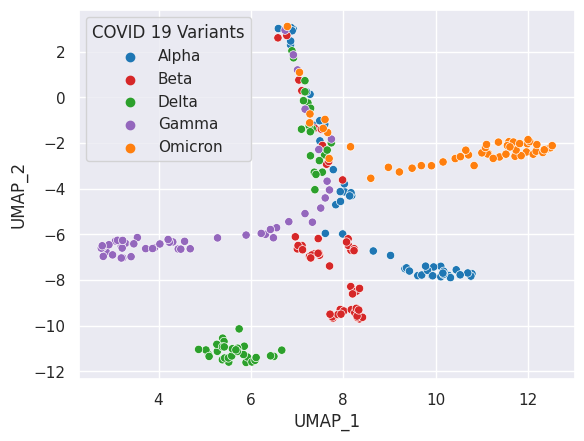

In [220]:
reducer = umap.UMAP(random_state=3,
                    n_neighbors=17, #default 15
                    min_dist=0.2 #default =0.1
                   ) 
three_mer_umap=reducer.fit_transform(three_mer_standardized)
#convert to dataframe and add strains
three_mer_umap=pd.DataFrame(data=three_mer_umap)
three_mer_umap['COVID 19 Variants']=three_mer_strains
three_mer_umap[0]=three_mer_umap[0].apply(lambda x:x*-1)
#three_mer_umap[1]=three_mer_umap[1].apply(lambda x:x*-1)
#create color dict for variant:color

# #plot the figure
plot=sns.scatterplot(data=three_mer_umap,x=three_mer_umap[1],
                     y=three_mer_umap[0],hue='COVID 19 Variants',
                     palette=umap_color_dict)
plot.set(xlabel="UMAP_1")
plot.set(ylabel="UMAP_2")